# **AP155 Lab Assignment**
## Module 5: Partial Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.



### Student Information

_Full Name (Last Name, First Name)_: Hojo, Hiroshi\
_Student No._: 202201830\
_Section_: TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Hiroshi Hojo (SGD.)

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[100]**/100

Score breakdown:
* Problem 1 - [100]/100

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**The Schrodinger equation and the Crank-Nicolson method**

_Refer to Exercise 9.8 in the Newman text._ In this problem, you will use the Crank-Nicolson method to solve the full time-dependent Schrodinger equation and hence develop a picture of how a wavefunction evolves over time.

Consider an electron (mass $M = 9.109 \times 10^{-31}$ kg) in a box of length $L = 10^{-8}$ m. Suppose that at time $t = 0$ the wavefunction of the electron has the form

$$ \psi(x,0) = \exp\left[-\frac{(x-x_0)^2}{2\sigma^2}\right]e^{i\kappa x},$$
where $x_0 = \frac{L}{2}$, $\sigma = 1 \times 10^{-10}$ m, $\kappa = 5 \times 10^{10} {\rm m}^{-1}$,  and $\psi = 0$ on the walls at $x = 0$ and $x = L$.

1. Perform a single step of the Crank-Nicolson method for this electron, calculating the vector $\psi(t)$ of values of the wavefunction, given the initial wavefunction above and using $N = 1000$ spatial slices with $a = L/N$. Your program will have to perform the following steps. First, given the vector $\psi(0)$ at $t = 0$, you will have to multiply by the matrix $\bf{B}$ to get a vector $\bf{v} = \bf{B}\psi$. Because of the tridiagonal form of $\bf{B}$, this is fairly simple. The $i$th component of $\bf{v}$ is given by
$$ v_i = b_1\psi_i + b_2(\psi_{i+1} + \psi_{i-1}).$$

   You will also have to choose a value for the time-step $h$. A reasonable choice is $h = 10^{-18}$ s. *(30 pts.)*

2. Second you will have to solve the linear system ${\bf Ax}= {\bf v}$ for $\bf{x}$, which gives you the new value of $\psi$. You could do this using a standard linear equation solver like the function $\tt solve$ in numpy's $\tt linalg$. *(20 pts.)*

3. Once you have the code in place to perform a single step of the calculation, extend your program to perform repeated steps and hence solve for $\psi$ at a sequence of times a separation $h$ apart. Note that the matrix $\bf A$ is independent of time, so it doesn't change from one step to another. You can set up the matrix just once and then keep on reusing it for every step. *(30 pts.)*

4. Make an animation of the solution by displaying the real part of the wavefunction at each time-step. You can use the function rate from the package visual to ensure a smooth frame-rate for your animation-- see Section 3.5 on page 117 of the Newman text.

   Run your animation for a while and describe what you see. Write a few sentences explaining in physics terms what is going on in the system. *(20 pts.)*

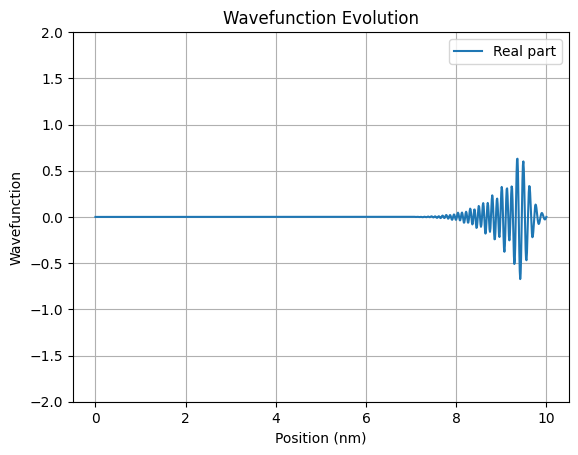

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# Constants
h = 1e-17  # Time step size (s)
hbar = 1.0546e-34  # Reduced Planck's constant (J·s)
L = 1e-8  # Length of the spatial domain (m)
M = 9.109e-31  # Mass of an electron (kg)
N = 1000  # Number of spatial grid slices
a = L / N  # Grid spacing (m)

# Coefficients for the Crank-Nicolson method
a1 = 1 + h * hbar / (2 * M * a**2) * 1j  # Diagonal coefficient of matrix A
a2 = -h * hbar * 1j / (4 * M * a**2)  # Off-diagonal coefficient of matrix A
b1 = 1 - h * hbar / (2 * M * a**2) * 1j  # Coefficient for the wavefunction vector
b2 = h * hbar * 1j / (4 * M * a**2)  # Coefficient for neighboring wavefunction values

# Define the initial wavefunction
def psi0(x):
    x0 = L / 2  # Center of the wave packet
    sigma = 1e-10  # Standard deviation of the Gaussian envelope (m)
    k = 5e10  # Wave vector (1/m)
    # Gaussian envelope modulated by a complex exponential (plane wave)
    return np.exp(-(x - x0)**2 / (2 * sigma**2)) * np.exp(1j * k * x)

# Spatial grid
x = np.linspace(0, L, N + 1)  # Grid points along the length
psi = np.zeros(N + 1, dtype=complex)  # Initialize the wavefunction array
psi[:] = psi0(x)  # Assign the initial wavefunction
psi[0] = psi[N] = 0  # Enforce boundary conditions (wavefunction is zero at the edges)

# Construct matrix A for the Crank-Nicolson method
A = np.zeros((N-1, N-1), dtype=complex)  # Matrix for the linear system
np.fill_diagonal(A, a1)  # Fill the main diagonal with a1
np.fill_diagonal(A[1:], a2)  # Fill the sub-diagonal with a2
np.fill_diagonal(A[:, 1:], a2)  # Fill the super-diagonal with a2

# Time evolution loop
for t in range(1000):  # Iterate over 1000 time steps
    # Calculate the vector v using the current wavefunction
    v = b1 * psi[1:N] + b2 * (psi[2:N+1] + psi[0:N-1])
    
    # Solve the system of equations A * psi_next = v to find the next wavefunction
    psi_next = np.zeros(N+1, dtype=complex)  # Temporary array for the next wavefunction
    psi_next[1:N] = np.linalg.solve(A, v)  # Solve the system for interior points
    
    # Update the wavefunction
    psi = psi_next

    # Visualization of the wavefunction evolution
    clear_output(wait=True)  # Clear the previous plot
    plt.plot(x * 1e9, np.real(psi), label="Real part")  # Plot the real part of the wavefunction
    plt.xlabel("Position (nm)")  # Label for the x-axis
    plt.ylabel("Wavefunction")  # Label for the y-axis
    plt.title("Wavefunction Evolution")  # Plot title
    plt.legend()  # Add legend
    plt.ylim(-2, 2)  # Fix the y-axis range
    plt.grid()  # Display grid lines
    display(plt.gcf())  # Display the plot
    time.sleep(0.05)  # Pause for 50 milliseconds
    plt.clf()  # Clear the current figure


The repeated motion of the wave packet moving right, reflecting back to the left, and so on, is an example of quantum wave packet reflection and interference. This type of motion demonstrates the wave-particle duality of quantum systems, where the particle exhibits both wave-like propagation and confinement within the spatial domain. It also highlights the role of boundary conditions in shaping the system's behavior.

As the wave packet moves, it eventually interacts with the boundaries of the spatial domain. Since I've enforced zero wavefunction values at the edges (boundary conditions), the wave packet reflects back. This bouncing behavior is characteristic of wave-like phenomena and results from interference of the wave with itself upon hitting the boundaries.

The width of the wave packet is significant because it determines the region where the particle is most likely to be found. A wider wave packet implies the particle's position is more uncertain, with a higher probability of being spread over a larger area. Conversely, a narrower wave packet indicates the particle’s position is more confined to a smaller region.

Over time, the wave packet spreads out due to its composition of multiple momentum components, each traveling at a different velocity. These differences cause the components to separate, resulting in the wave packet expanding. This process is known as dispersion.

When the wave packet encounters the boundaries at x = 0 and x = L, it reflects off them instead of passing through. This behavior ensures the boundary condition psi(0) = 0 and psi(L) = 0 is satisfied, meaning the particle cannot exist beyond these points.

As the wave packet reflects, it interacts with itself, creating interference effects. While some parts of the wave packet are reflected, others continue moving toward the boundary. The reflected waves overlap with the incoming waves, producing interference patterns. These patterns result from the constructive and destructive interference between the two wave components.